In [84]:
import os
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

In [85]:
phase_dir = '../phased_ihart'
ped_file = '../../DATA/ihart/ihart.ped'

In [105]:
child_to_crossovers = defaultdict(list)
for file in sorted(os.listdir(phase_dir)):
    if file.endswith('.crossovers.json'):
        with open('%s/%s' % (phase_dir, file), 'r') as f:
            for co in json.load(f):
                if isinstance(co['child'], str):
                    pass
                    #child_to_crossovers[(co['child'],)].append(co)
                else:
                    child_to_crossovers[tuple(co['child'])].append(co)
print(len(child_to_crossovers))

1111


In [106]:
child_to_affected = dict()
with open(ped_file, 'r') as f:
    for line in f:
        pieces = line.strip().split('\t')
        child_to_affected[pieces[1]] = pieces[5]

In [107]:
child_to_num_mat_crossovers = dict()
child_to_num_pat_crossovers = dict()
child_to_famsize = dict()
for children, crossovers in child_to_crossovers.items():
    if len(children)==2:
        child_to_num_mat_crossovers[children] = len([x for x in crossovers if x['is_mat']])/2
        child_to_num_pat_crossovers[children] = len([x for x in crossovers if x['is_pat']])/2
        child_to_famsize[children] = crossovers[0]['family_size']

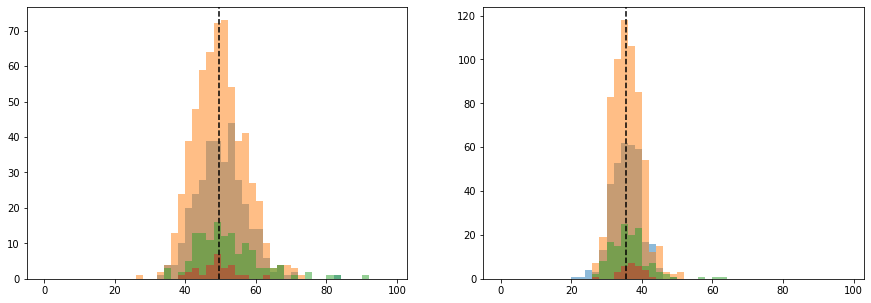

In [121]:
children = sorted([x for x in child_to_num_mat_crossovers.keys()])
num_crossovers_mat = np.array([child_to_num_mat_crossovers[x] for x in children])
num_crossovers_pat = np.array([child_to_num_pat_crossovers[x] for x in children])
famsize = np.array([child_to_famsize[x] for x in children])

#bins = np.arange(0, 200, 5)
bins = np.arange(0, 100, 2)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(np.clip(num_crossovers_mat[famsize==4], 0, 99), bins=bins, alpha=0.5)
plt.hist(np.clip(num_crossovers_mat[famsize==5], 0, 99), bins=bins, alpha=0.5)
plt.hist(np.clip(num_crossovers_mat[famsize==6], 0, 99), bins=bins, alpha=0.5)
plt.hist(np.clip(num_crossovers_mat[famsize>6], 0, 99), bins=bins, alpha=0.5)
plt.axvline(np.median(num_crossovers_mat), color='black', linestyle='--')

plt.subplot(1, 2, 2)
plt.hist(np.clip(num_crossovers_pat[famsize==4], 0, 99), bins=bins, alpha=0.5)
plt.hist(np.clip(num_crossovers_pat[famsize==5], 0, 99), bins=bins, alpha=0.5)
plt.hist(np.clip(num_crossovers_pat[famsize==6], 0, 99), bins=bins, alpha=0.5)
plt.hist(np.clip(num_crossovers_pat[famsize>6], 0, 99), bins=bins, alpha=0.5)
plt.axvline(np.median(num_crossovers_pat), color='black', linestyle='--')
plt.show()

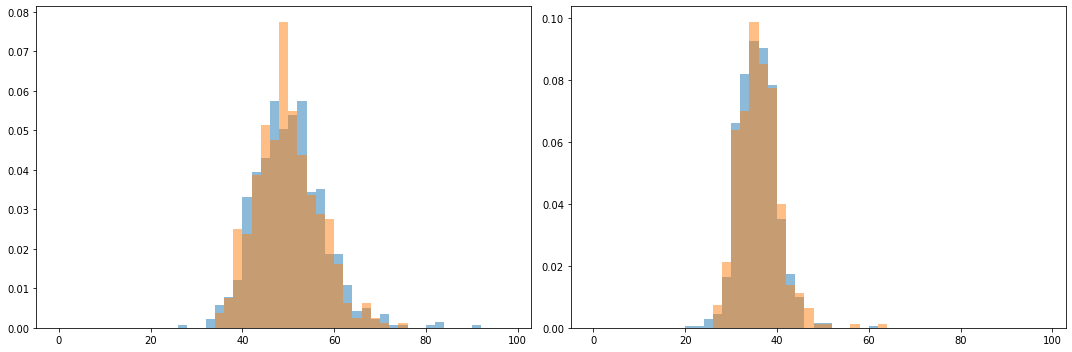

In [115]:
both_asd = np.array([child_to_affected[x[0]]=='2' and child_to_affected[x[1]]=='2' for x in children])
one_asd = np.array([(child_to_affected[x[0]]=='1' and child_to_affected[x[1]]=='2') or (child_to_affected[x[0]]=='2' and child_to_affected[x[1]]=='1') for x in children])
both_nt = np.array([child_to_affected[x[0]]=='1' and child_to_affected[x[1]]=='1' for x in children])


plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(num_crossovers_mat[both_asd], bins=bins, alpha=0.5, density=True)
plt.hist(num_crossovers_mat[one_asd], bins=bins, alpha=0.5, density=True)
#plt.hist(num_crossovers_mat[both_nt], bins=bins, alpha=0.5, density=True)

plt.subplot(1, 2, 2)
plt.hist(num_crossovers_pat[both_asd], bins=bins, alpha=0.5, density=True)
plt.hist(num_crossovers_pat[one_asd], bins=bins, alpha=0.5, density=True)
#plt.hist(num_crossovers_pat[both_nt], bins=bins, alpha=0.5, density=True)

plt.tight_layout()
plt.show()